In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

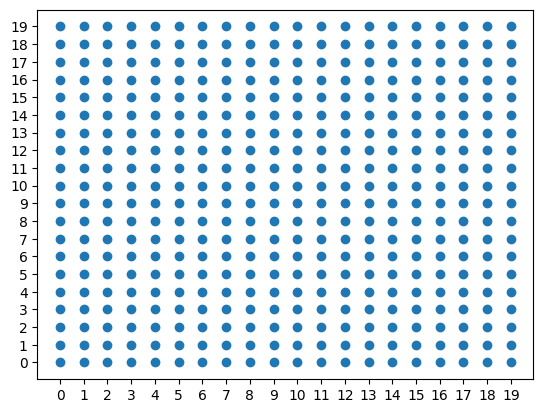

In [2]:
# Mesh
xc = np.arange(0,20,1)
yc = np.arange(0,20,1)
xc,yc = np.meshgrid(xc,yc)

plt.scatter(xc,yc)
plt.xticks(np.arange(0,20,1));
plt.yticks(np.arange(0,20,1)); 

In [33]:
n = input('Enter number of vehicles:' )
n = int(n)
coors = []
for i in range(n):
    c = input(f'Enter Coordinate for Car {i+1}:' )
    coors.append(c)
V = [list(map(int, pair.split(','))) for pair in coors]

n = input('Enter number of deliveries:' )
n = int(n)
coors = []
for i in range(n):
    c = input(f'Enter Coordinate for Delivery {i+1}:' )
    coors.append(c)
D = [list(map(int, pair.split(','))) for pair in coors]


In [61]:
def bresenham_line(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    
    x_step = 1 if x0 < x1 else -1
    y_step = 1 if y0 < y1 else -1
    
    path_points = [(x0, y0)]
    
    if dx > dy:
        error = dx / 2
        while x0 != x1:
            x0 += x_step
            error -= dy
            if error < 0:
                y0 += y_step
                error += dx
            path_points.append((x0, y0))
    if dy > dx:
        error = dy / 2
        while y0 != y1:
            y0 += y_step
            error -= dx
            if error < 0:
                x0 += x_step
                error += dy
            path_points.append((x0, y0))

    return path_points

In [84]:
# Paths
D = np.array(D)
V = np.array(V)
all_direct_paths = []
for i in range(D.shape[0]):
    start_point = [10,10]
    end_point = D[i, :]
        # Compute the direct path
    direct_path = bresenham_line(start_point[0], start_point[1], end_point[0], end_point[1])
    all_direct_paths.append(np.array(direct_path))
print(all_direct_paths)

all_direct_paths2 = []
for i in range(D.shape[0]):
    for j in range(D.shape[0]):
        start_point = D[i,:]
        end_point = D[j, :]
            # Compute the direct path
        direct_path = bresenham_line(start_point[0], start_point[1], end_point[0], end_point[1])
        all_direct_paths2.append(np.array(direct_path))
print(all_direct_paths2)



[array([[10, 10],
       [10, 11],
       [11, 12],
       [11, 13],
       [12, 14],
       [12, 15],
       [13, 16],
       [13, 17],
       [14, 18]]), array([[10, 10],
       [10,  9],
       [ 9,  8],
       [ 9,  7],
       [ 8,  6],
       [ 8,  5],
       [ 7,  4],
       [ 7,  3],
       [ 6,  2]]), array([[10, 10],
       [ 9, 10],
       [ 8, 10],
       [ 7, 10],
       [ 6, 10],
       [ 5, 10],
       [ 4, 10],
       [ 3, 10],
       [ 2, 10]])]
[array([[14, 18]]), array([[14, 18],
       [14, 17],
       [13, 16],
       [13, 15],
       [12, 14],
       [12, 13],
       [11, 12],
       [11, 11],
       [10, 10],
       [10,  9],
       [ 9,  8],
       [ 9,  7],
       [ 8,  6],
       [ 8,  5],
       [ 7,  4],
       [ 7,  3],
       [ 6,  2]]), array([[14, 18],
       [13, 17],
       [12, 17],
       [11, 16],
       [10, 15],
       [ 9, 15],
       [ 8, 14],
       [ 7, 13],
       [ 6, 13],
       [ 5, 12],
       [ 4, 11],
       [ 3, 11],
       [ 2, 10]]), 

In [86]:
all_distances = []

for path in all_direct_paths2:
    distance = 0
    for i in range(1, len(path)):
        between_points = np.abs(path[i] - path[i - 1])
        distance += np.sqrt(np.sum(between_points**2))
    all_distances.append(distance)

print(all_distances)

[0, 19.313708498984763, 15.313708498984763, 19.313708498984763, 0, 9.65685424949238, 15.313708498984763, 9.65685424949238, 0]


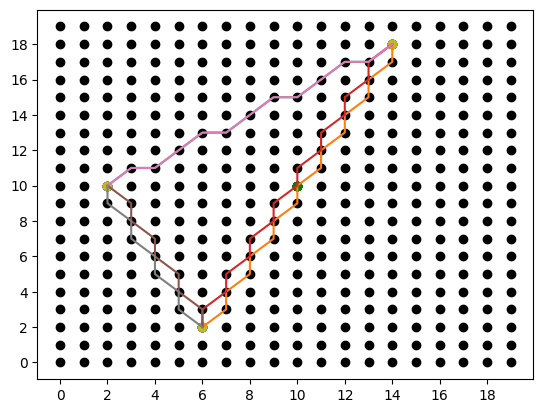

In [85]:
plt.scatter(xc,yc,color='black')
for path in all_direct_paths1:
    plt.scatter(10, 10, color='green',marker='o')
    plt.plot(path[:, 0], path[:, 1])
    plt.scatter(D[:,0],D[:,1])
    plt.xticks(np.arange(0,20,2))
    plt.yticks(np.arange(0,20,2)) 




In [ ]:
def is_valid(x, y, grid):
    # Check if the given position (x, y) is within the grid boundaries
    return 0 <= x < len(grid) and 0 <= y < len(grid[0])

def dfs_paths(grid, start, end, path=[]):
    x, y = start
    path = path + [(x, y)]

    if start == end:
        return [path]

    paths = []

    for neighbor in [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]:
        nx, ny = neighbor
        if is_valid(nx, ny, grid) and neighbor not in path:
            new_paths = dfs_paths(grid, neighbor, end, path)
            paths.extend(new_paths)

    return paths

# Example mesh grid (0 represents an open cell, 1 represents an obstacle)
grid = np.zeros((5, 5), dtype=int)

start_point = (2, 2)
end_point = (4, 4)

paths = dfs_paths(grid, start_point, end_point)